In [1]:
import time
from minlsh import MinHashLSHiForest
from sklearn.metrics import roc_auc_score
import func
import data_loader

In [2]:
# CIC
# 実行のたびに結果が変わるのはなぜ？
X_train, y_train, X_test, y_test, y_cat = data_loader.load_cic_for_minhash() 
print(f"X_train size is {len(X_train)}")
print(f"X_test size is {len(X_test)}")
print(X_train.head())

X_train size is 29101
X_test size is 15000
0    {Dst Port:3389, PSH Flag Cnt:1, Bwd URG Flags:...
1    {PSH Flag Cnt:0, Bwd URG Flags:0, FIN Flag Cnt...
2    {PSH Flag Cnt:0, Dst Port:53, Bwd URG Flags:0,...
3    {PSH Flag Cnt:0, Dst Port:53, Bwd URG Flags:0,...
4    {Dst Port:3389, PSH Flag Cnt:1, Bwd URG Flags:...
dtype: object


In [3]:
lshif = MinHashLSHiForest(n_estimators=100, sample_size=256, eta=1.0)
start = time.time()
lshif.fit(X_train)
stop = time.time()
print(f"Trained Time: {stop-start}")

start = time.time()
scores = lshif.decision_function(X_test)
stop = time.time()
print(f"Executed Time: {stop-start}")

auc_scores = roc_auc_score(y_test, scores)
print(f"AUC Score: {auc_scores}")

Trained Time: 1.08781099319458
Executed Time: 24.453794240951538
AUC Score: 0.7116378280574335


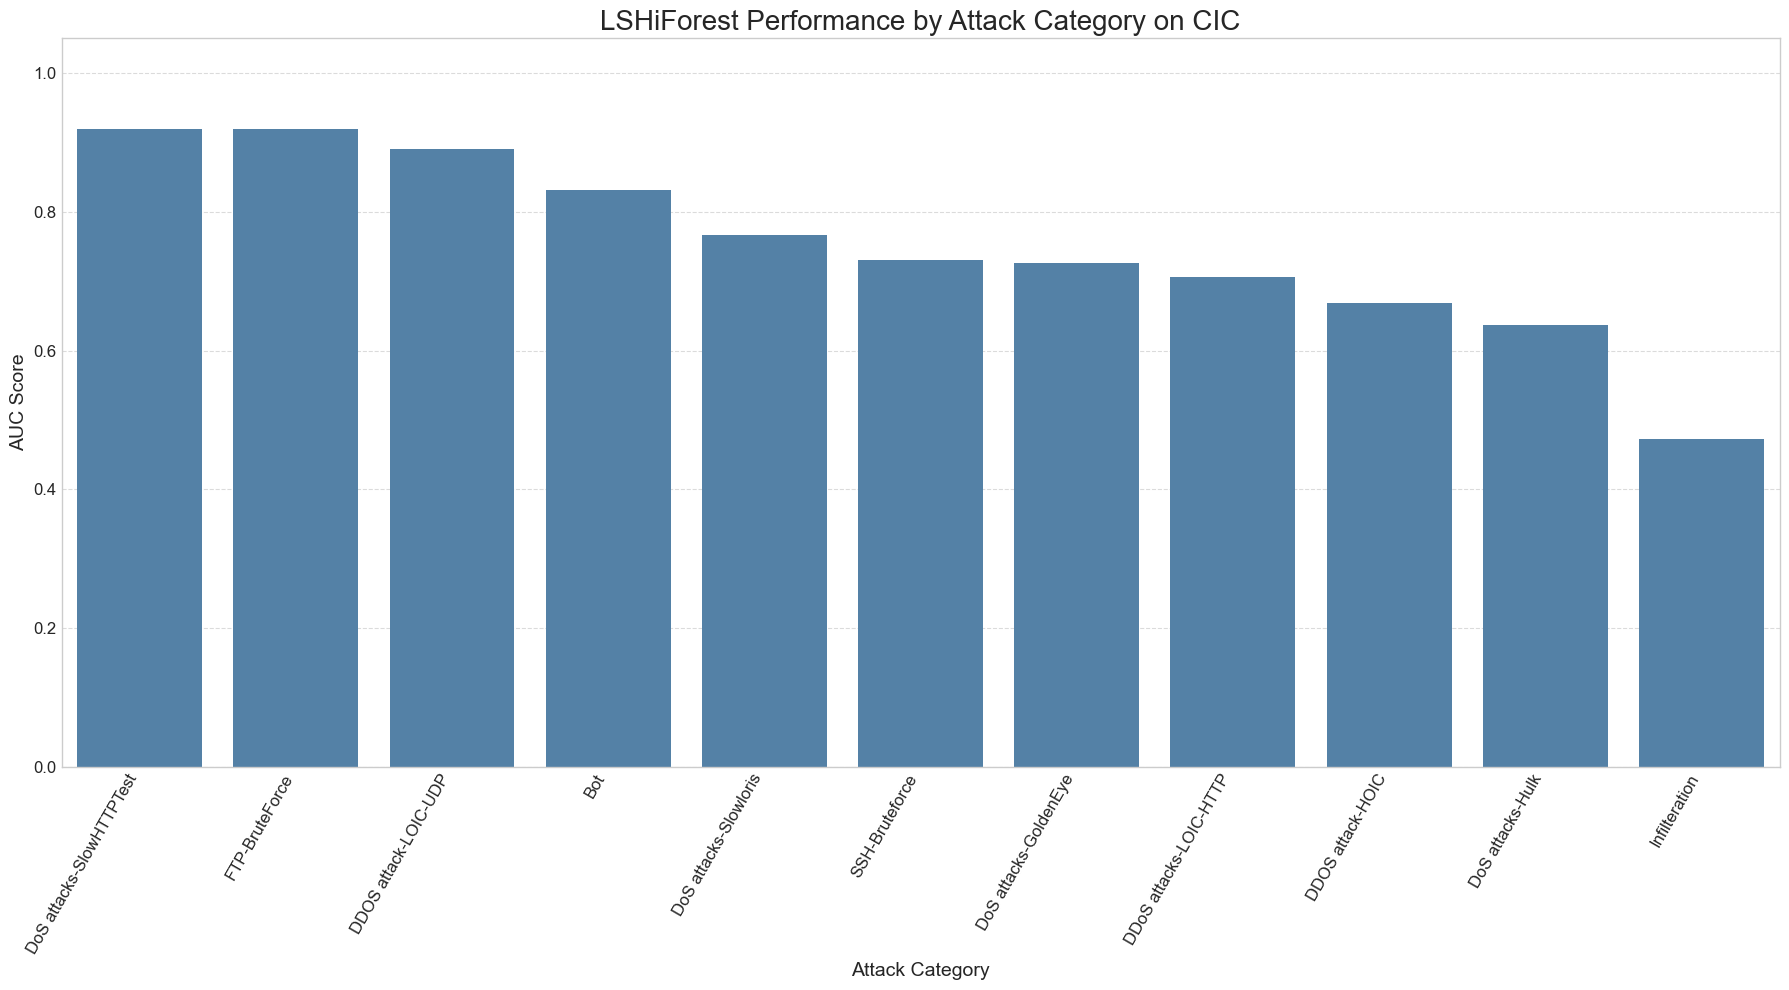

AUC Scores (Each Attack Category vs. Normal Traffic):
             Attack Category  AUC Score
0   DoS attacks-SlowHTTPTest   0.918816
1             FTP-BruteForce   0.918816
2       DDOS attack-LOIC-UDP   0.890340
3                        Bot   0.831320
4      DoS attacks-Slowloris   0.766741
5             SSH-Bruteforce   0.730298
6      DoS attacks-GoldenEye   0.726392
7     DDoS attacks-LOIC-HTTP   0.706076
8           DDOS attack-HOIC   0.668378
9           DoS attacks-Hulk   0.636922
10             Infilteration   0.472210


<Figure size 640x480 with 0 Axes>

In [4]:
func.auc_by_attack(y_cat, y_test, scores, "CIC")

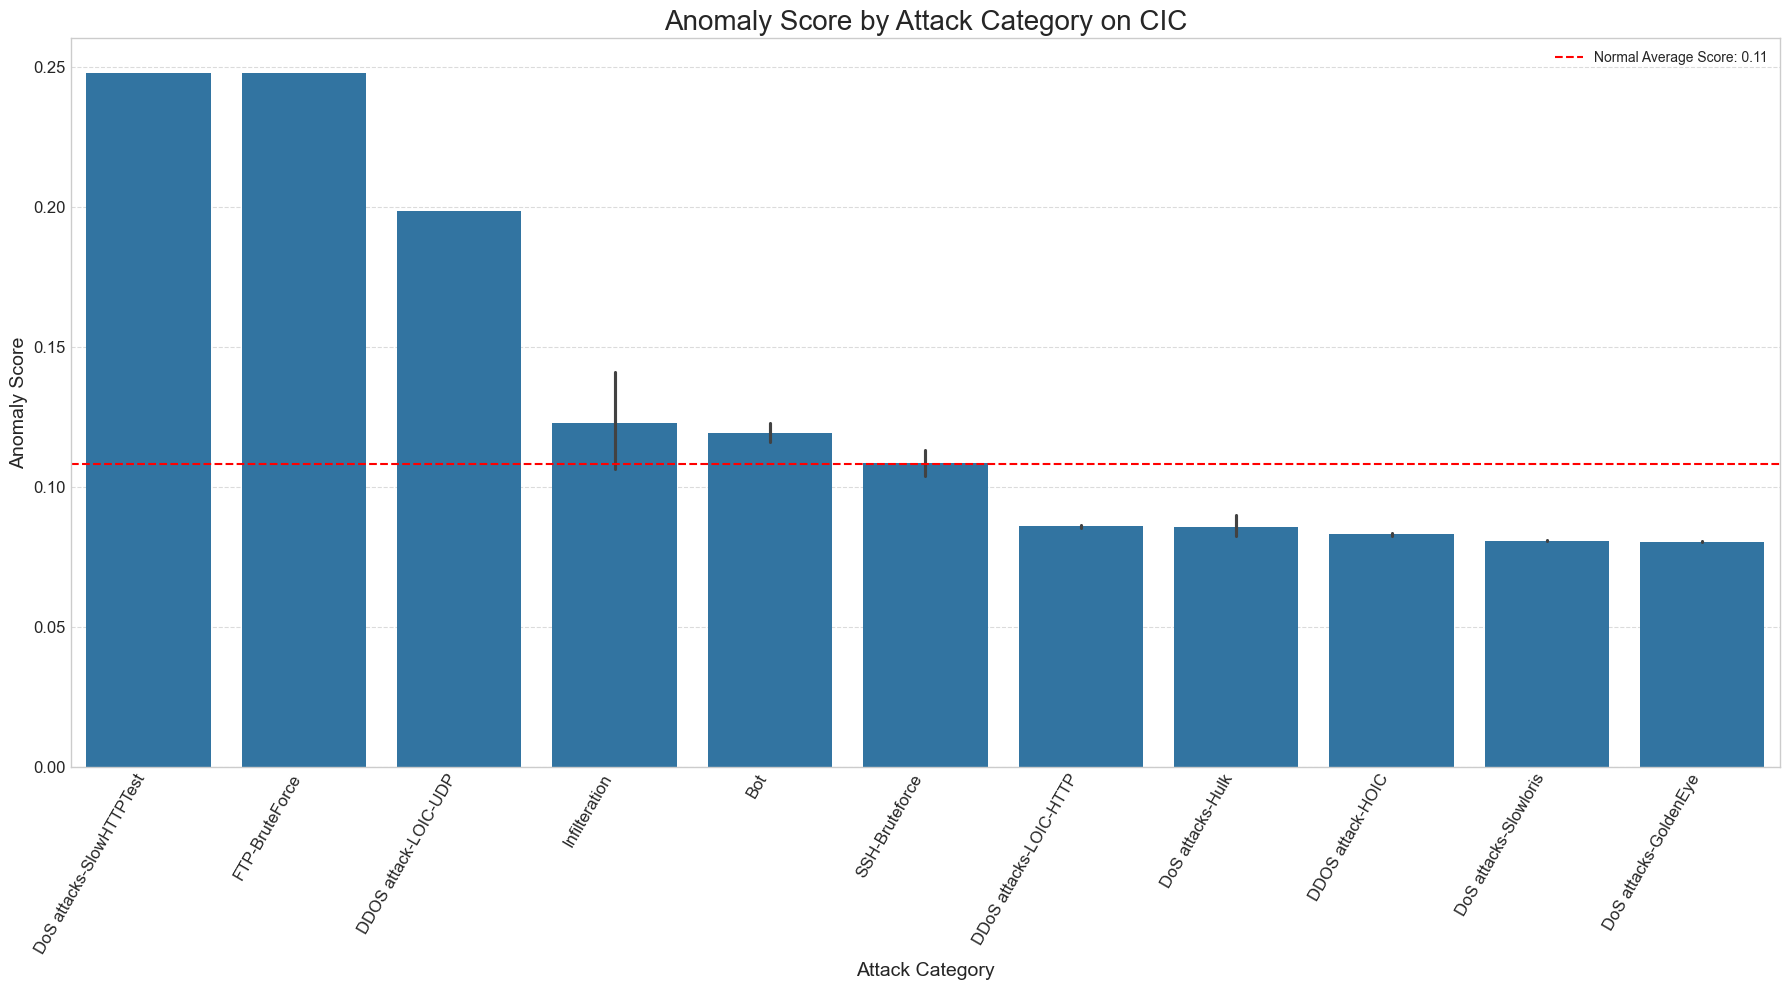

<Figure size 640x480 with 0 Axes>

In [5]:
func.plot_anomaly_score(y_cat, y_test, scores, "CIC")

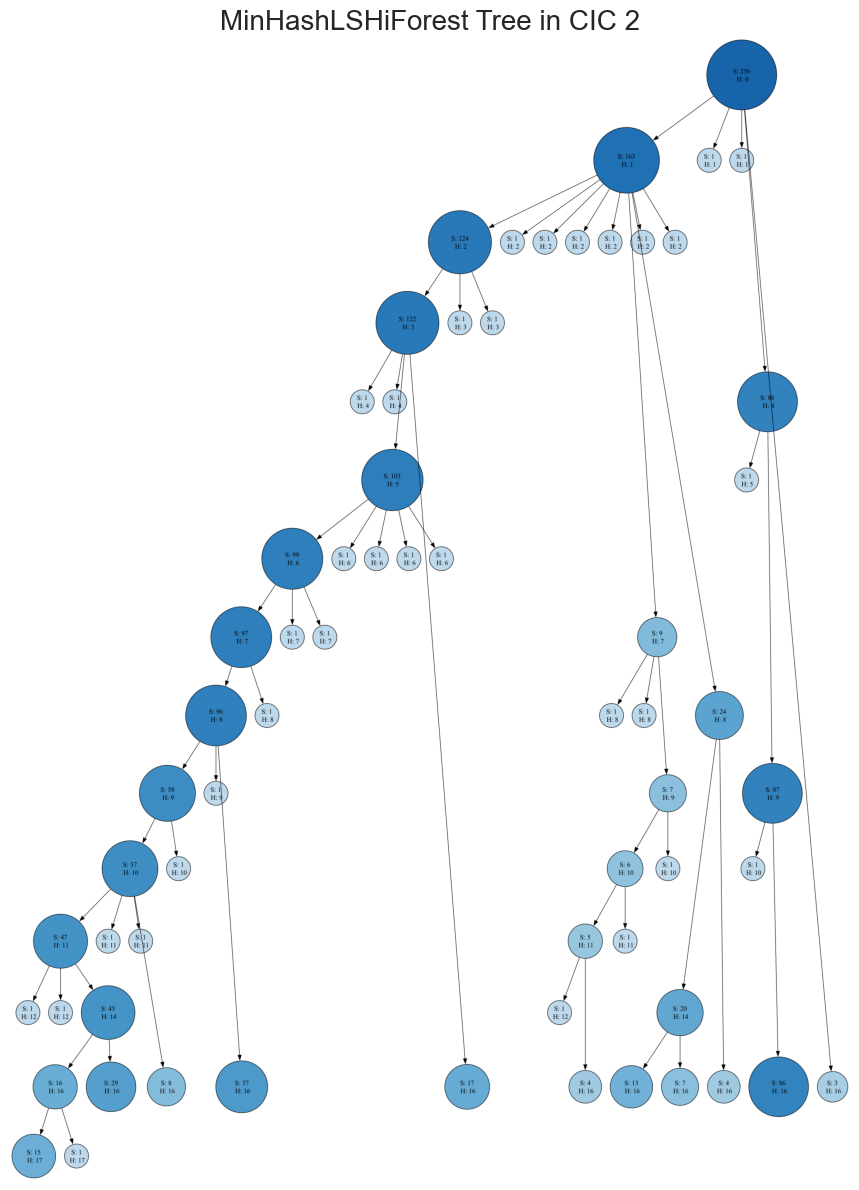

In [6]:
func.plot_tree(lshif, "CIC", tree_index=2)

In [7]:
# unswの実験
X_train, y_train, X_test, y_test, y_cat = data_loader.load_unsw_for_minhash()
print(f"X_train size is {len(X_train)}")
print(f"X_test size is {len(X_test)}")

X_train size is 56000
X_test size is 82332


In [8]:
# LSHiForestのインスタンス化と学習
lshif = MinHashLSHiForest(n_estimators=100, sample_size=256, eta=1.0)
start = time.time()
lshif.fit(X_train)
stop = time.time()
print(f"Trained Time: {stop-start}")

# 異常スコアの計算
start = time.time()
scores = lshif.decision_function(X_test)
stop = time.time()

# 2. AUCスコアを計算
print(f"Executed Time: {stop-start}")
auc_score = roc_auc_score(y_test, scores)
print(f"AUC Score: {auc_score}")

Trained Time: 0.6120948791503906
Executed Time: 31.3702552318573
AUC Score: 0.7987487721220736


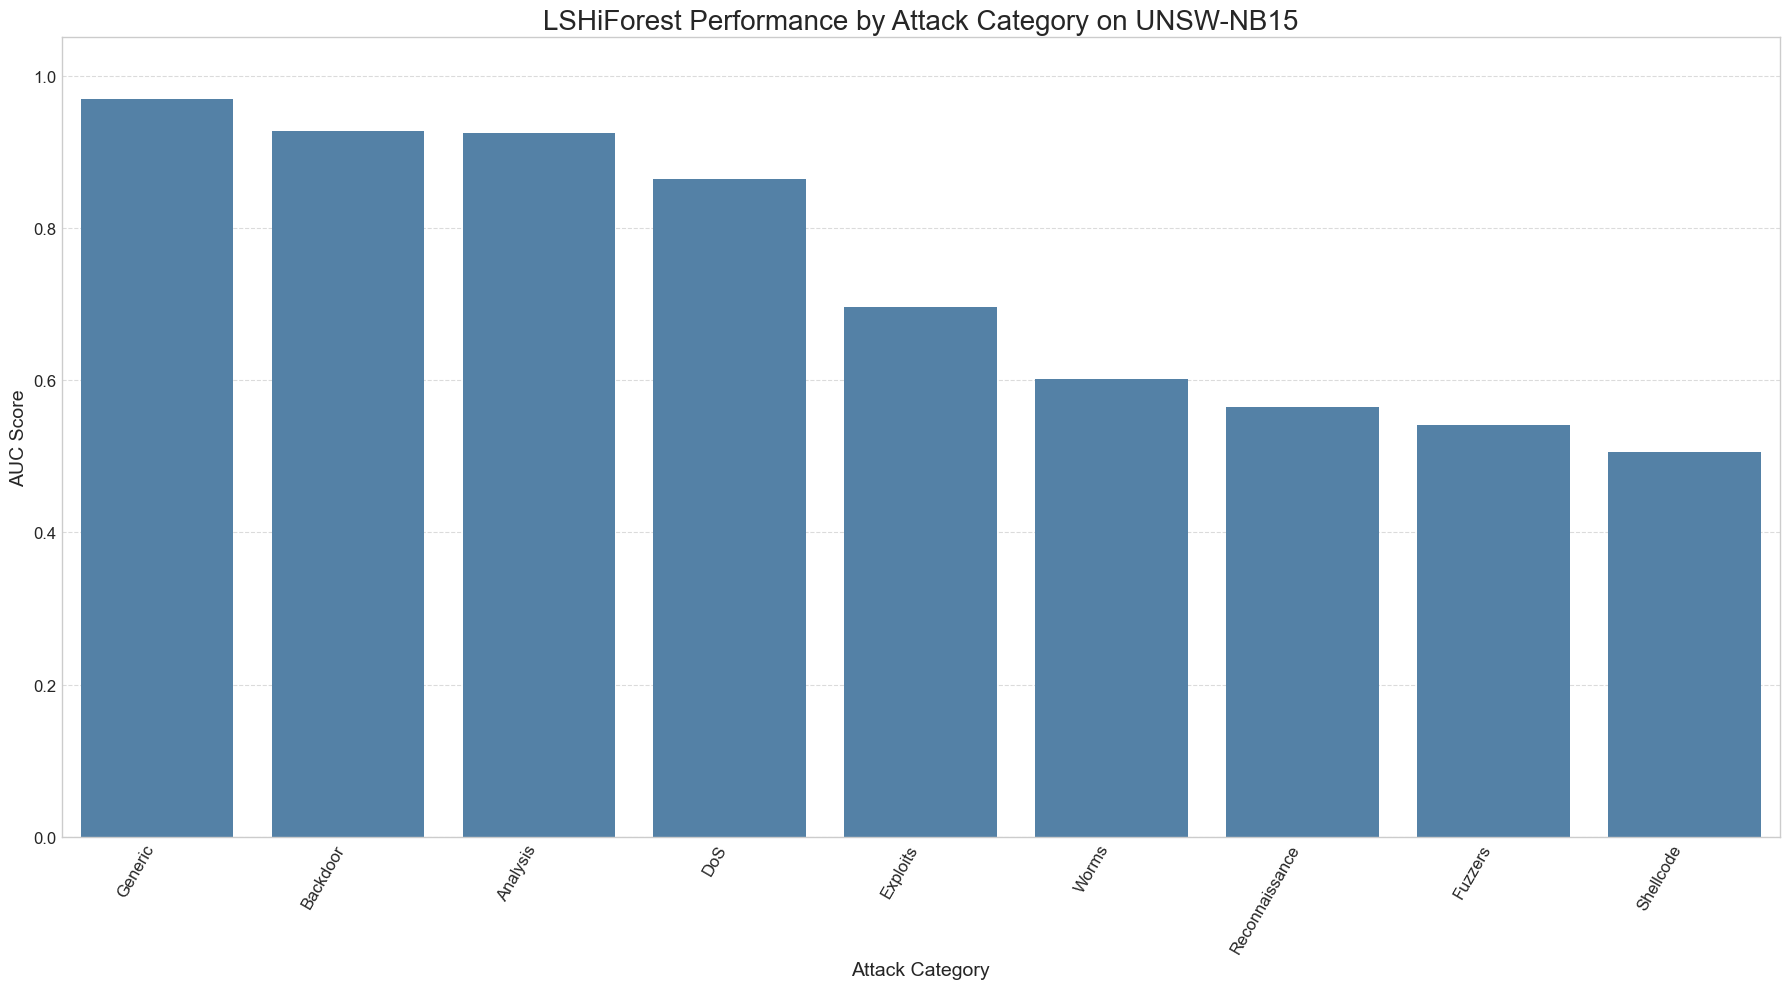

AUC Scores (Each Attack Category vs. Normal Traffic):
  Attack Category  AUC Score
0         Generic   0.969174
1        Backdoor   0.927330
2        Analysis   0.924608
3             DoS   0.864288
4        Exploits   0.695703
5           Worms   0.601771
6  Reconnaissance   0.564654
7         Fuzzers   0.541543
8       Shellcode   0.505354


<Figure size 640x480 with 0 Axes>

In [9]:
func.auc_by_attack(y_cat, y_test, scores, "UNSW-NB15")

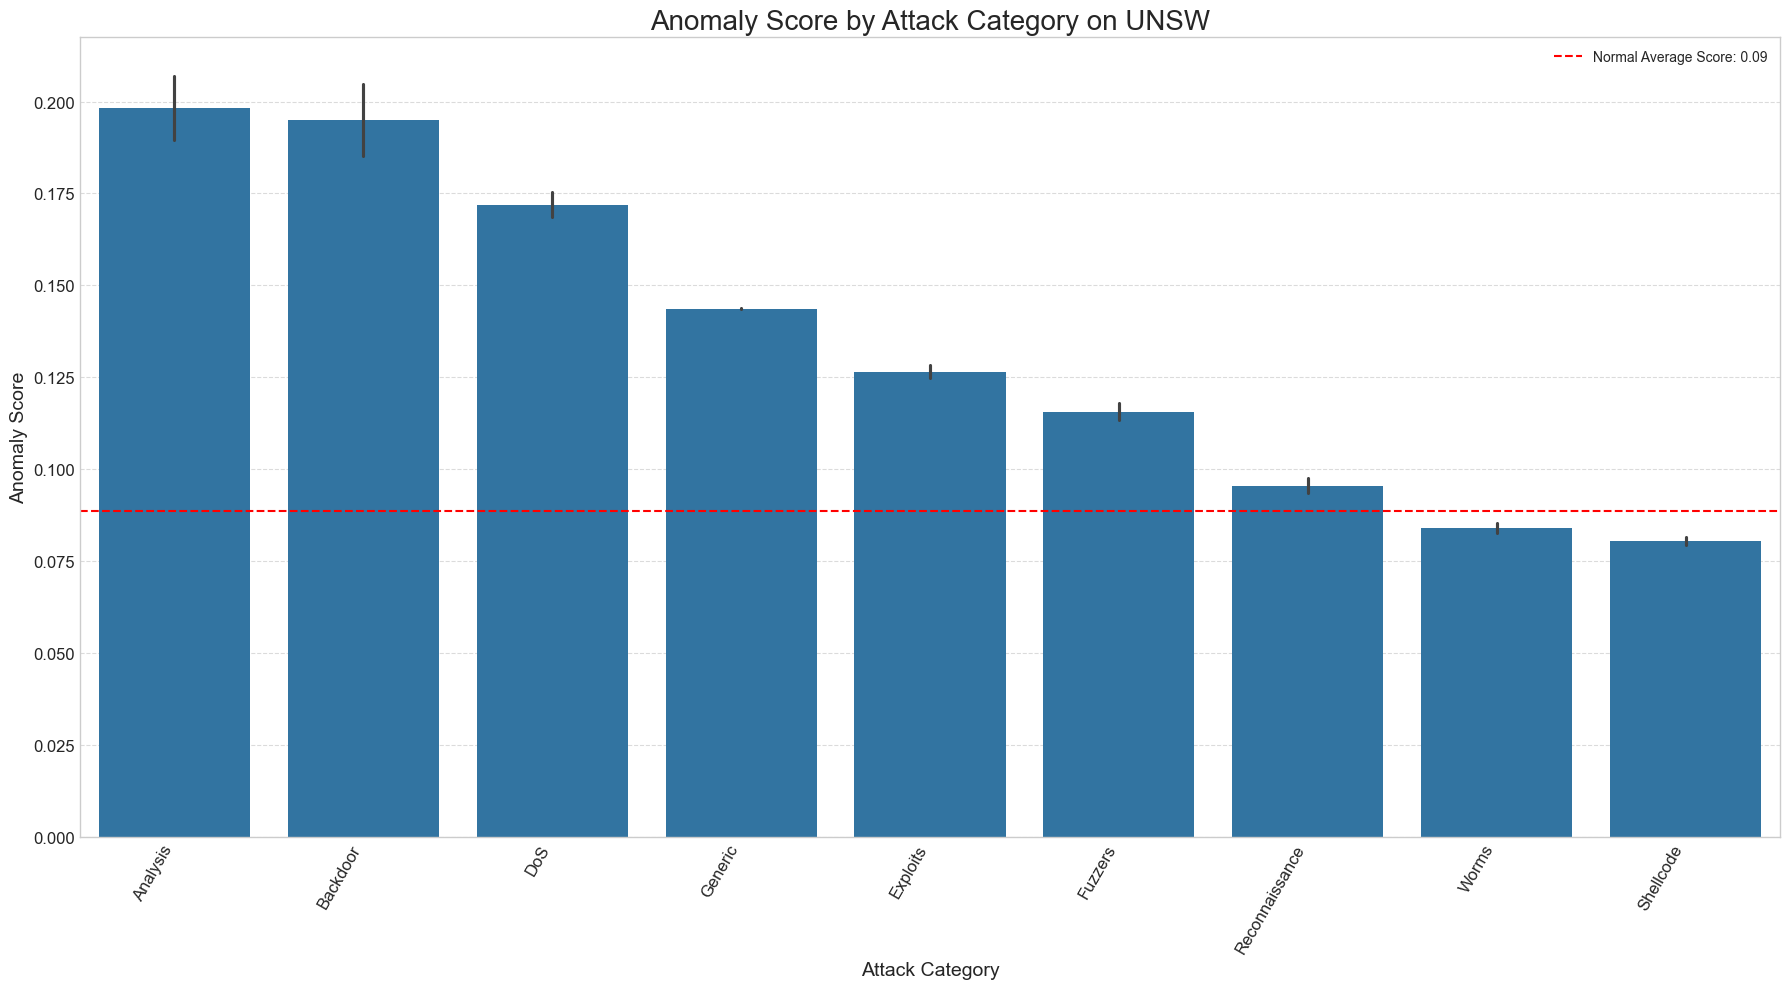

<Figure size 640x480 with 0 Axes>

In [10]:
func.plot_anomaly_score(y_cat, y_test, scores, "UNSW")

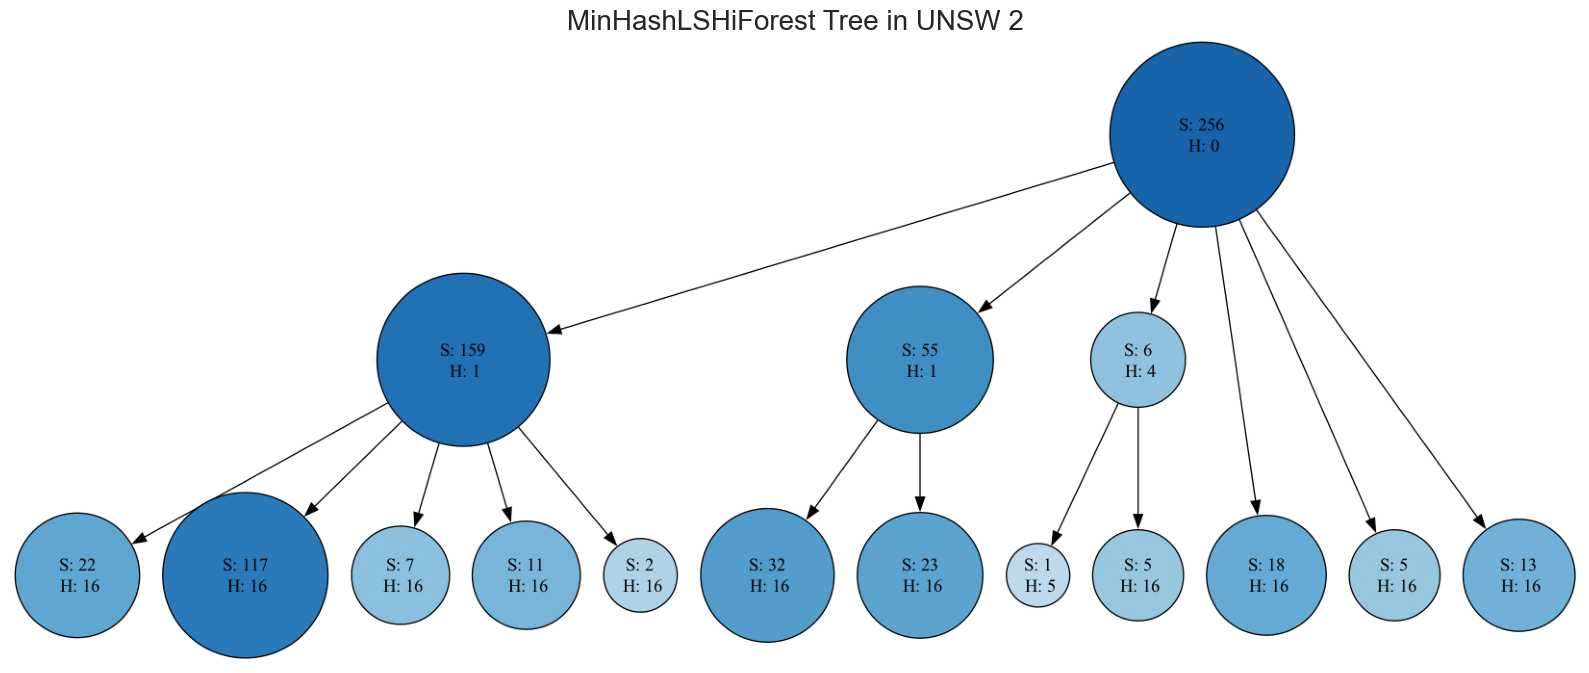

In [11]:
func.plot_tree(lshif, "UNSW", tree_index=2)

In [12]:
# NSL
X_train, y_train, X_test, y_test, y_cat = data_loader.load_nsl_for_minhash()
print(f"X_train size is {len(X_train)}")
print(f"X_test size is {len(X_test)}")

# LSHiForestのインスタンス化と学習
lshif = MinHashLSHiForest(n_estimators=100, sample_size=256, eta=1.0)
start = time.time()
lshif.fit(X_train)
stop = time.time()
print(f"Trained Time: {stop -start}")

# 異常スコアの計算
start = time.time()
scores = lshif.decision_function(X_test)
stop = time.time()

# 2. AUCスコアを計算
print(f"Executed Time: {stop-start}")
auc_scores = roc_auc_score(y_test, scores)
print(f"AUC Score: {auc_scores}")

X_train size is 67343
X_test size is 22544
Trained Time: 0.7136850357055664
Executed Time: 11.706760168075562
AUC Score: 0.941305040376617


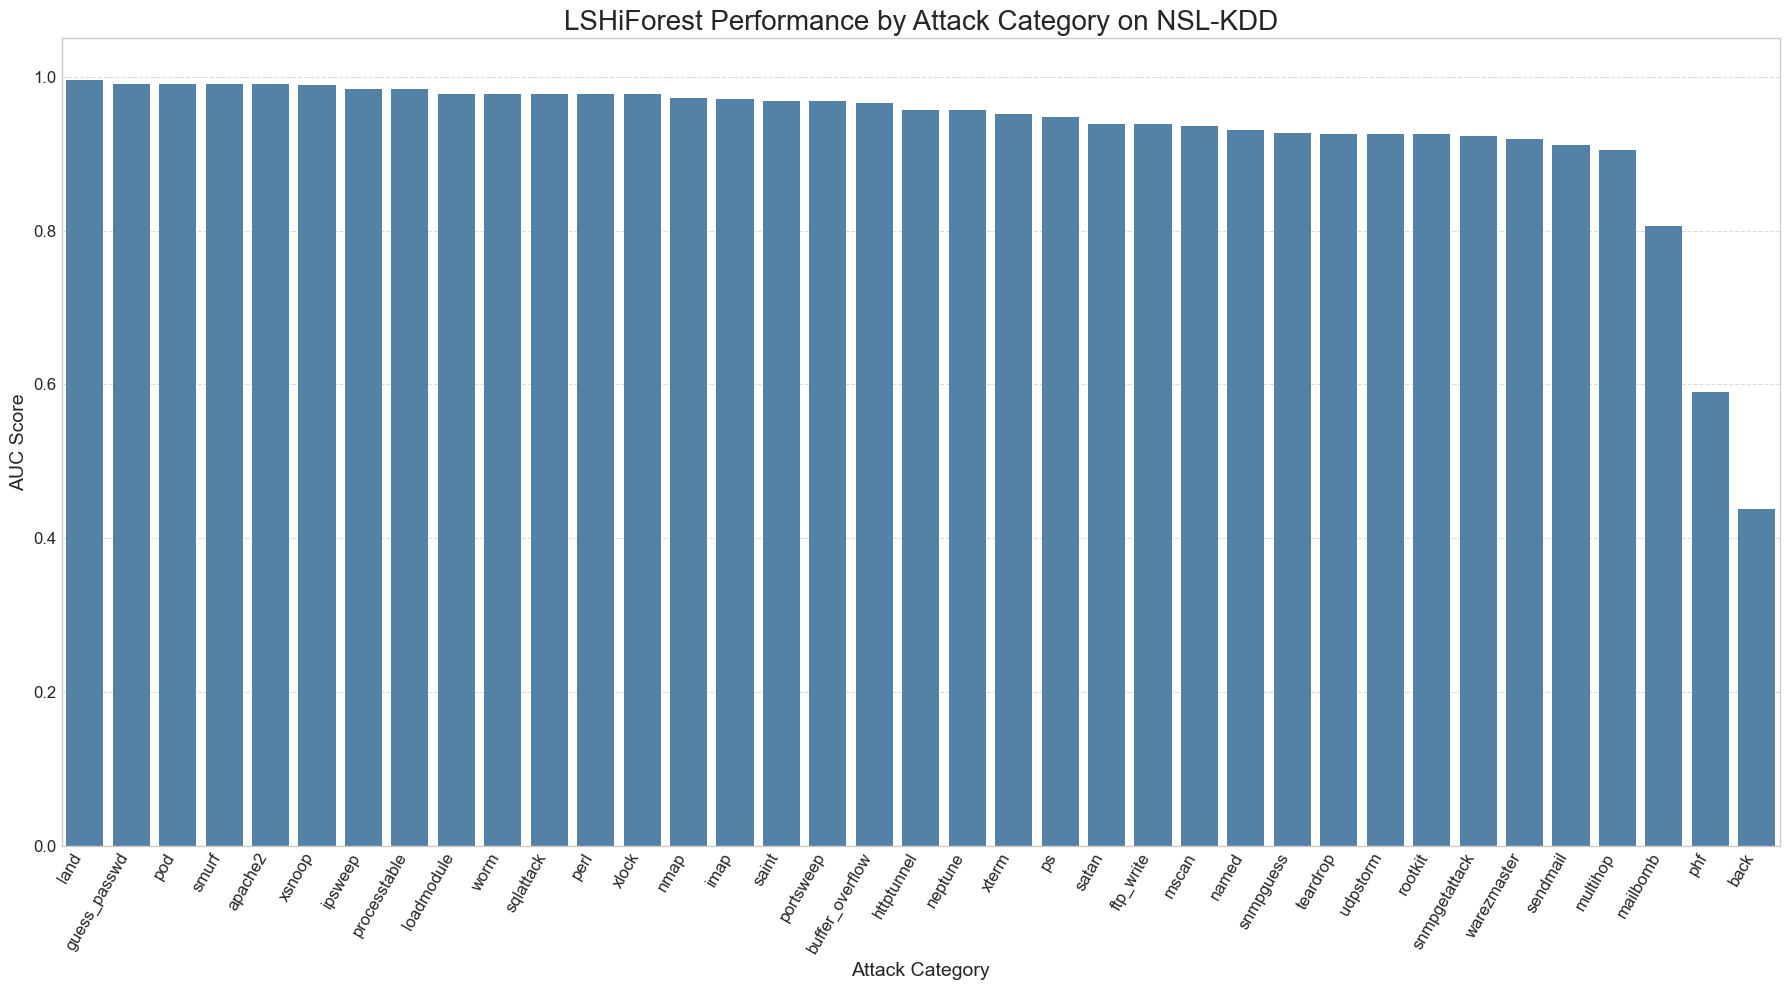

AUC Scores (Each Attack Category vs. Normal Traffic):
    Attack Category  AUC Score
0              land   0.995572
1      guess_passwd   0.991093
2               pod   0.991025
3             smurf   0.990629
4           apache2   0.990611
5            xsnoop   0.988827
6           ipsweep   0.984234
7      processtable   0.984223
8        loadmodule   0.978066
9              worm   0.978066
10        sqlattack   0.978066
11             perl   0.978066
12            xlock   0.977397
13             nmap   0.971923
14             imap   0.970755
15            saint   0.968698
16        portsweep   0.968075
17  buffer_overflow   0.966440
18       httptunnel   0.957505
19          neptune   0.956648
20            xterm   0.951407
21               ps   0.947949
22            satan   0.939072
23        ftp_write   0.938197
24            mscan   0.935610
25            named   0.930497
26        snmpguess   0.926766
27         teardrop   0.926269
28         udpstorm   0.926269
29          root

<Figure size 640x480 with 0 Axes>

In [13]:
func.auc_by_attack(y_cat, y_test, scores, "NSL-KDD")

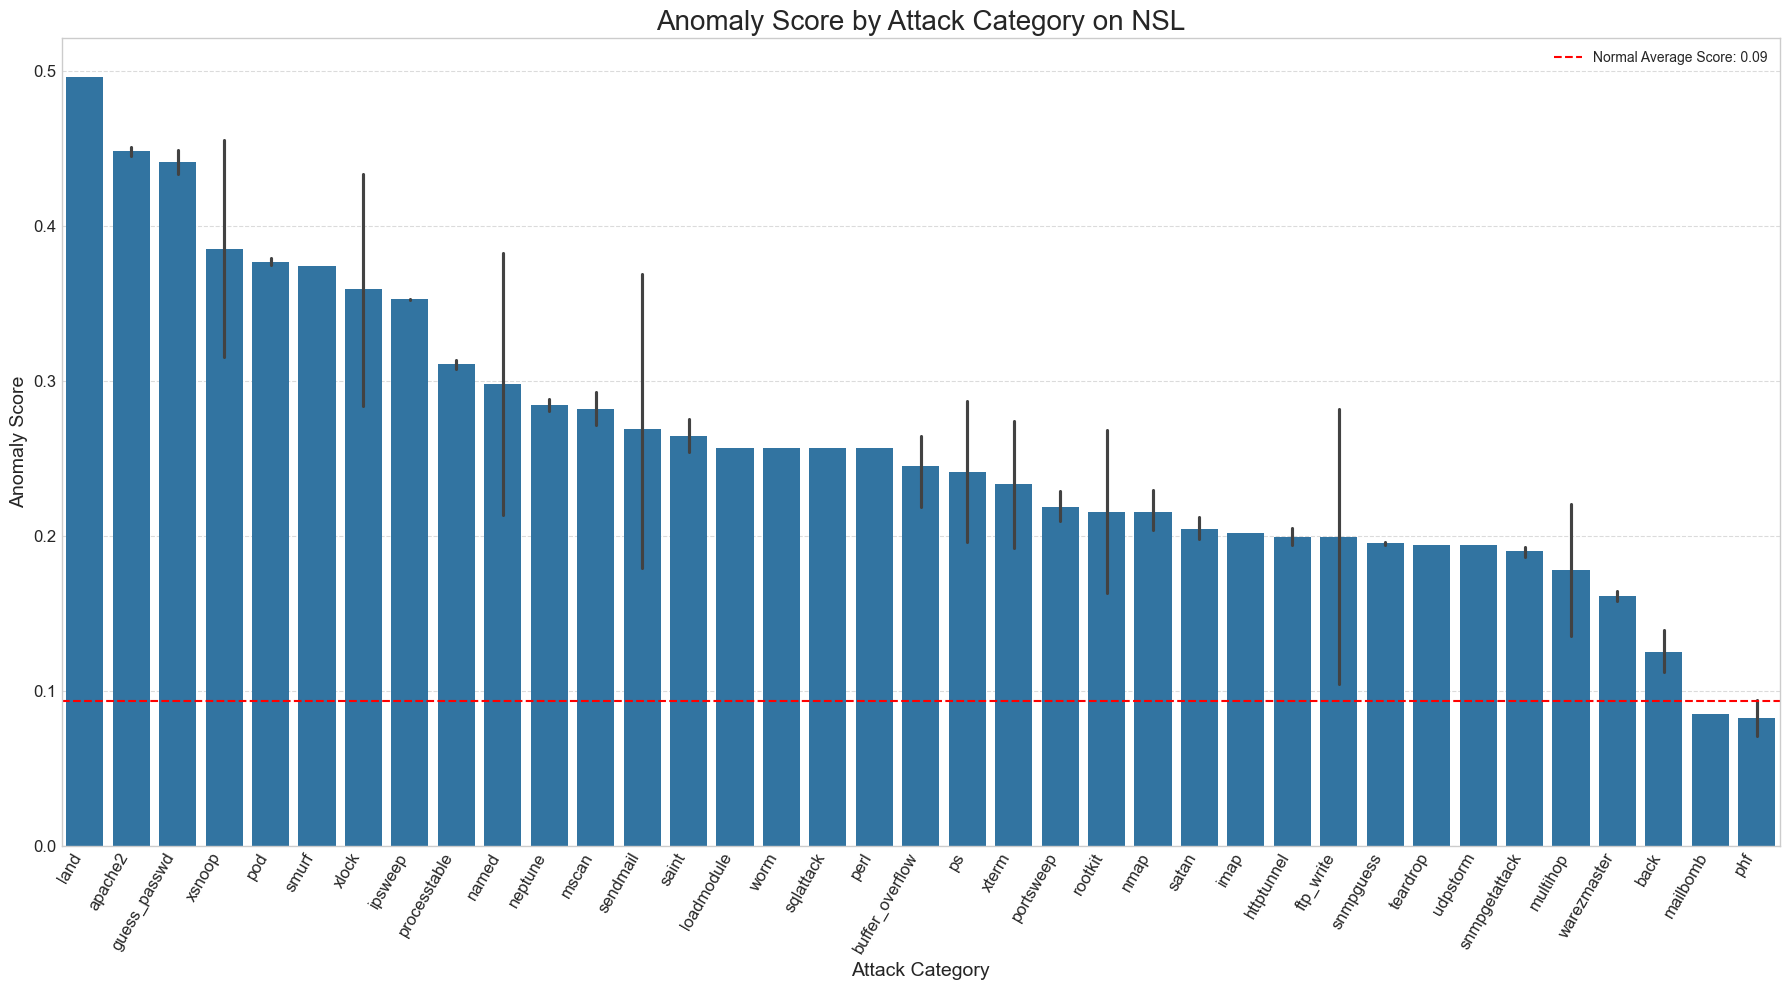

<Figure size 640x480 with 0 Axes>

In [14]:
func.plot_anomaly_score(y_cat, y_test, scores, "NSL")

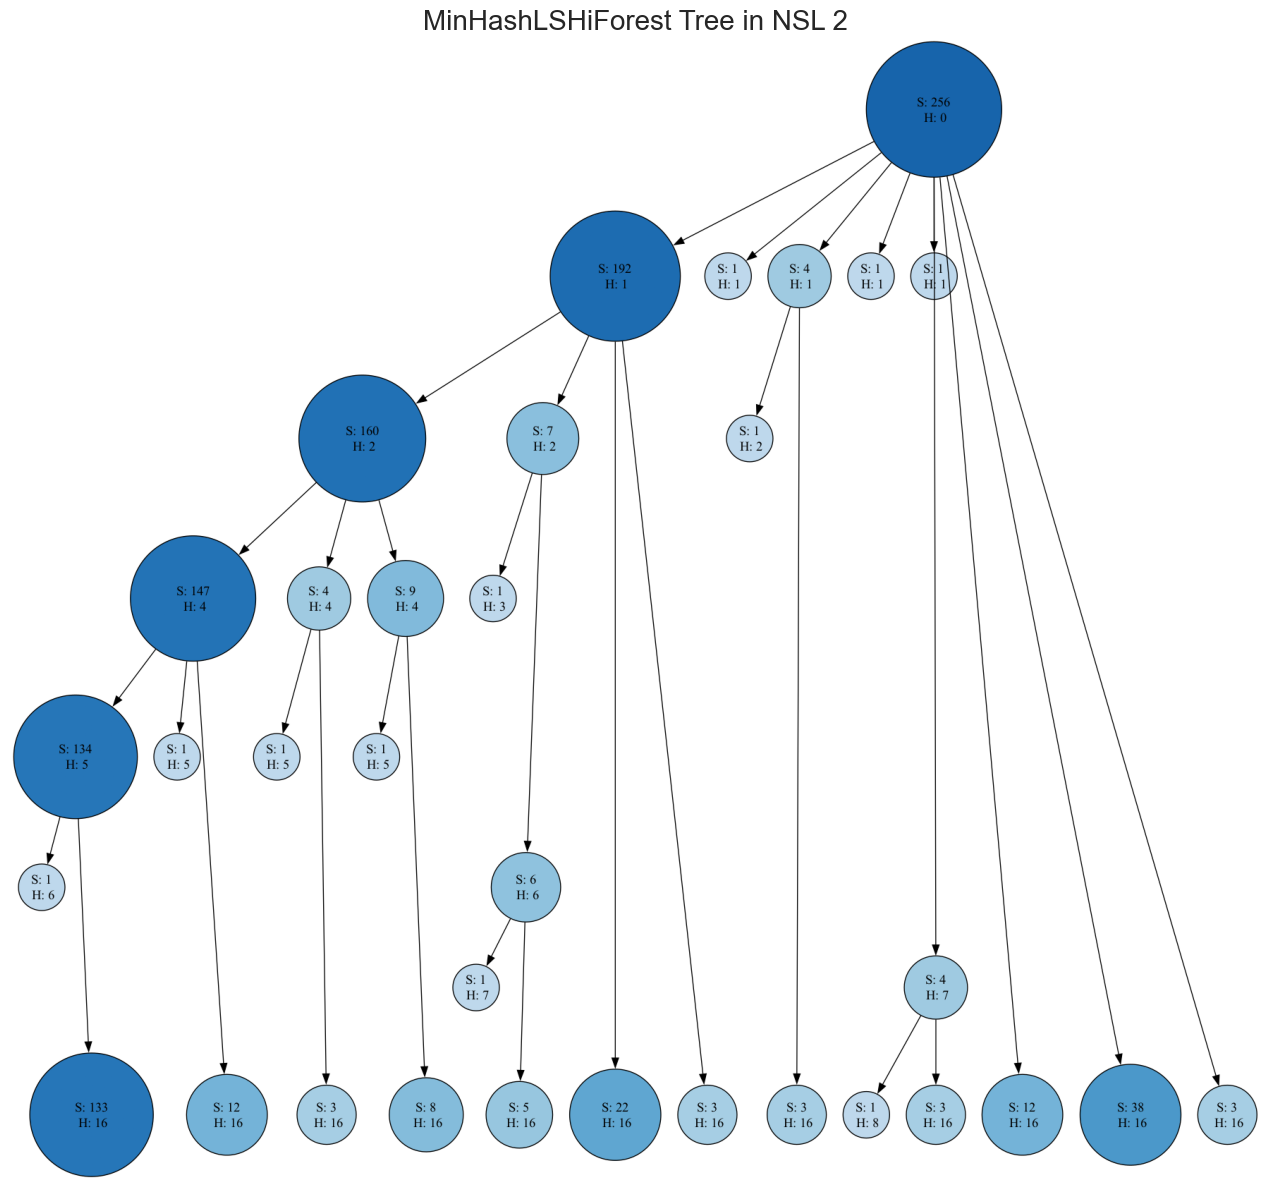

In [15]:
func.plot_tree(lshif, "NSL", tree_index=2)

In [16]:
# unswでbinningした数値特徴量とカテゴリ値で実験
X_train, y_train, X_test, y_test, y_cat = data_loader.load_unsw_binned()
print(f"X_train size is {len(X_train)}")
print(f"X_test size is {len(X_test)}")
X_train.head()

X_train size is 56000
X_test size is 82332


0    {proto:tcp, pca_1:3, is_ftp_login:0, pca_4:1, ...
1    {proto:tcp, pca_1:3, is_ftp_login:0, pca_4:1, ...
2    {proto:tcp, pca_1:3, is_ftp_login:0, pca_4:1, ...
3    {proto:tcp, pca_1:3, pca_4:1, is_sm_ips_ports:...
4    {proto:tcp, pca_2:3, is_ftp_login:0, pca_4:2, ...
dtype: object

In [17]:
# LSHiForestのインスタンス化と学習
lshif = MinHashLSHiForest(n_estimators=100, sample_size=256, eta=1.0)
start = time.time()
lshif.fit(X_train)
stop = time.time()
print(f"Trained Time: {stop -start}")

# 異常スコアの計算
start = time.time()
scores = lshif.decision_function(X_test)
stop = time.time()

# 2. AUCスコアを計算
print(f"Executed Time: {stop - start}")
auc_score = roc_auc_score(y_test, scores)
print(f"AUC Score: {auc_score}")

Trained Time: 0.8758771419525146
Executed Time: 74.18335795402527
AUC Score: 0.7528797222175851


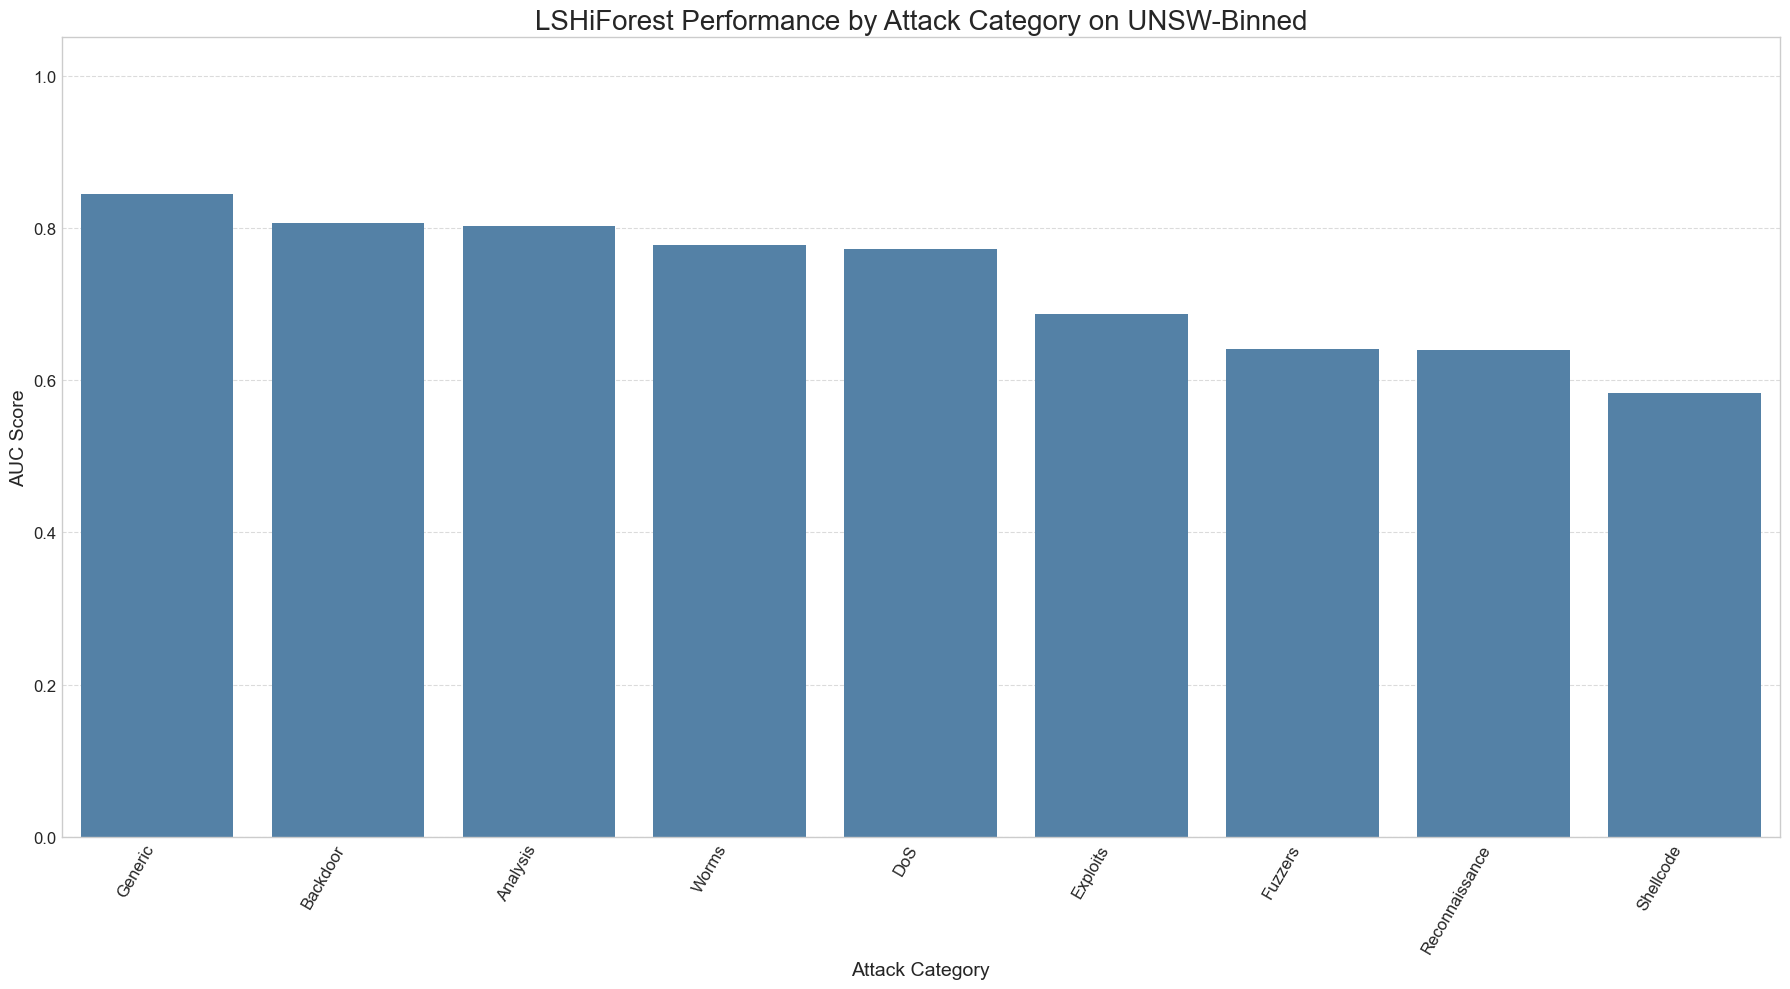

AUC Scores (Each Attack Category vs. Normal Traffic):
  Attack Category  AUC Score
0         Generic   0.844465
1        Backdoor   0.806701
2        Analysis   0.802940
3           Worms   0.776756
4             DoS   0.771814
5        Exploits   0.687221
6         Fuzzers   0.640854
7  Reconnaissance   0.639152
8       Shellcode   0.582402


<Figure size 640x480 with 0 Axes>

In [18]:
func.auc_by_attack(y_cat, y_test, scores, "UNSW-Binned")

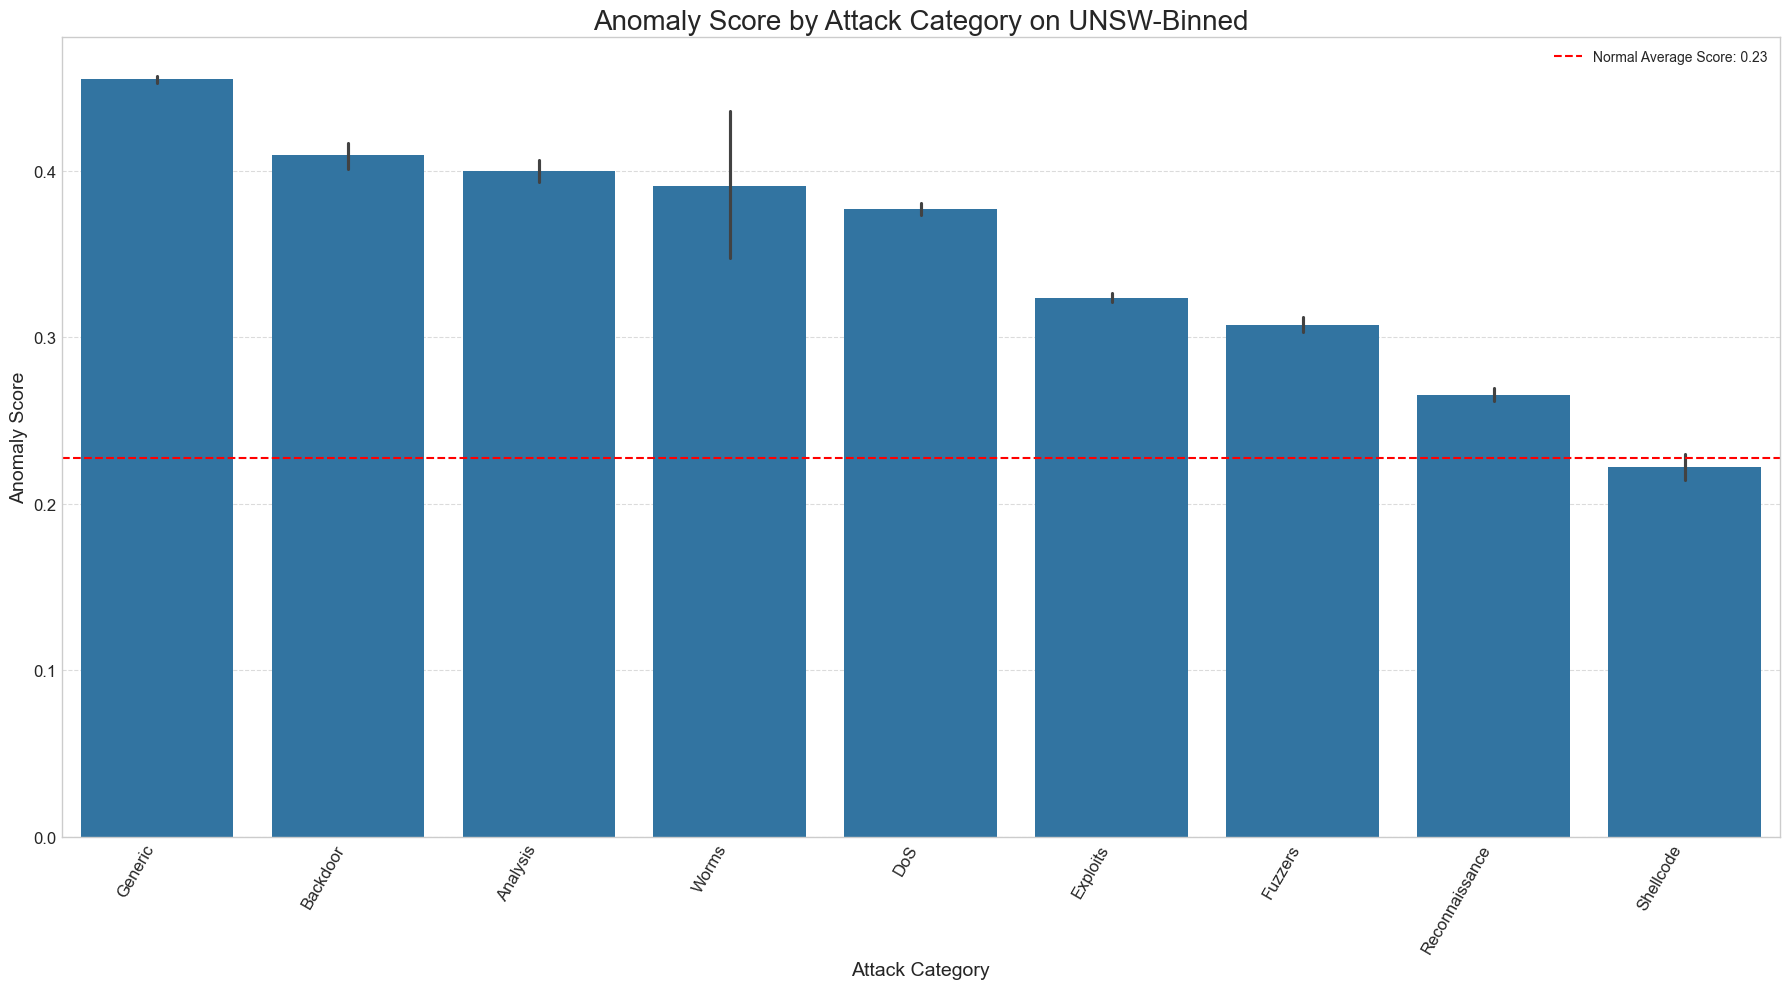

<Figure size 640x480 with 0 Axes>

In [19]:
func.plot_anomaly_score(y_cat, y_test, scores, "UNSW-Binned")

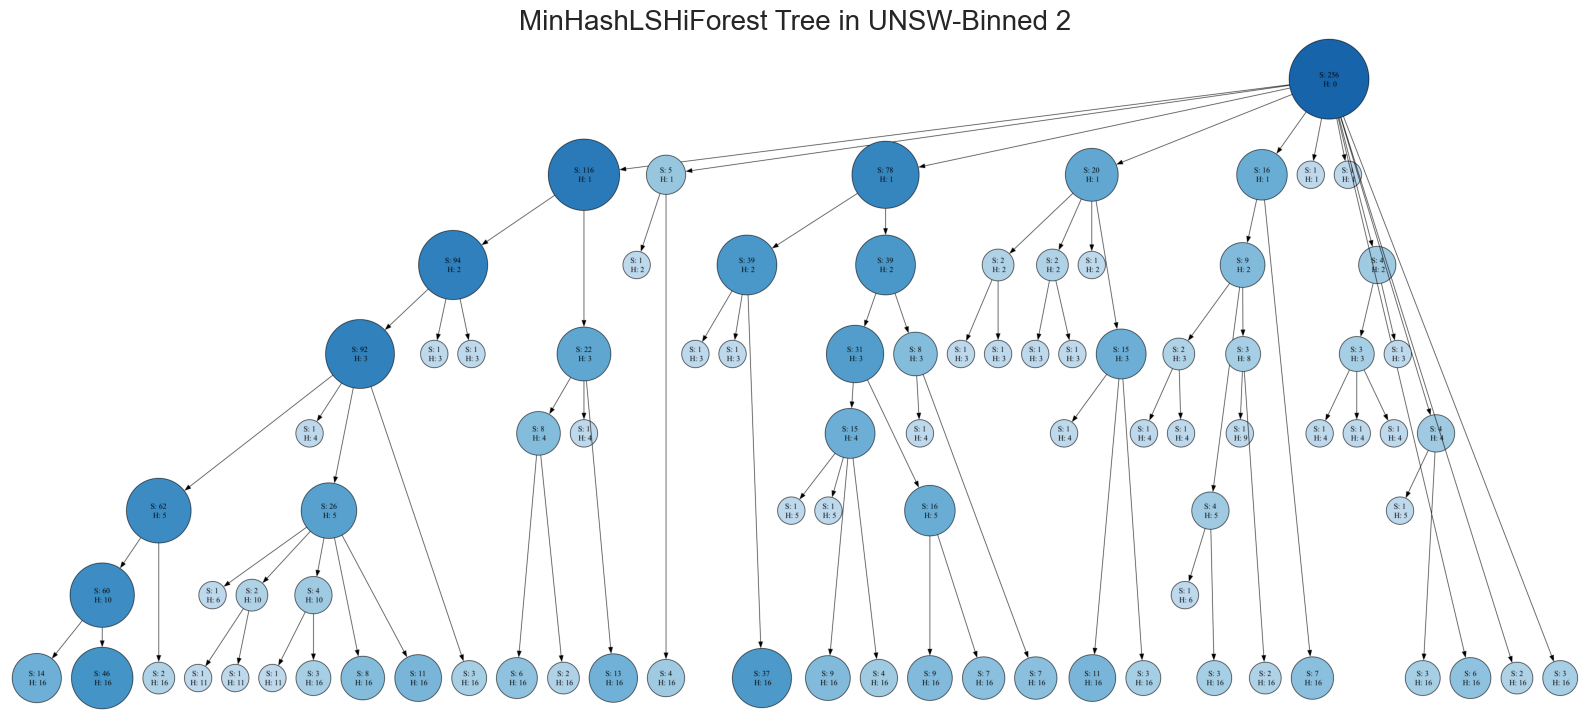

In [20]:
func.plot_tree(lshif, "UNSW-Binned", tree_index=2)

In [21]:
# NSL
X_train, y_train, X_test, y_test, y_cat = data_loader.load_nsl_binned()
print(f"X_train size is {len(X_train)}")
print(f"X_test size is {len(X_test)}")

# LSHiForestのインスタンス化と学習
lshif = MinHashLSHiForest(n_estimators=100, sample_size=256, eta=1.0)
start = time.time()
lshif.fit(X_train)
stop = time.time()
print(f"Trained Time: {stop -start}")

# 異常スコアの計算
start = time.time()
scores = lshif.decision_function(X_test)
stop = time.time()

# 2. AUCスコアを計算
print(f"Executed Time: {stop-start}")
auc_scores = roc_auc_score(y_test, scores)
print(f"AUC Score: {auc_scores}")

X_train size is 67343
X_test size is 22544
Trained Time: 1.058166742324829
Executed Time: 18.733118772506714
AUC Score: 0.9363060820527873


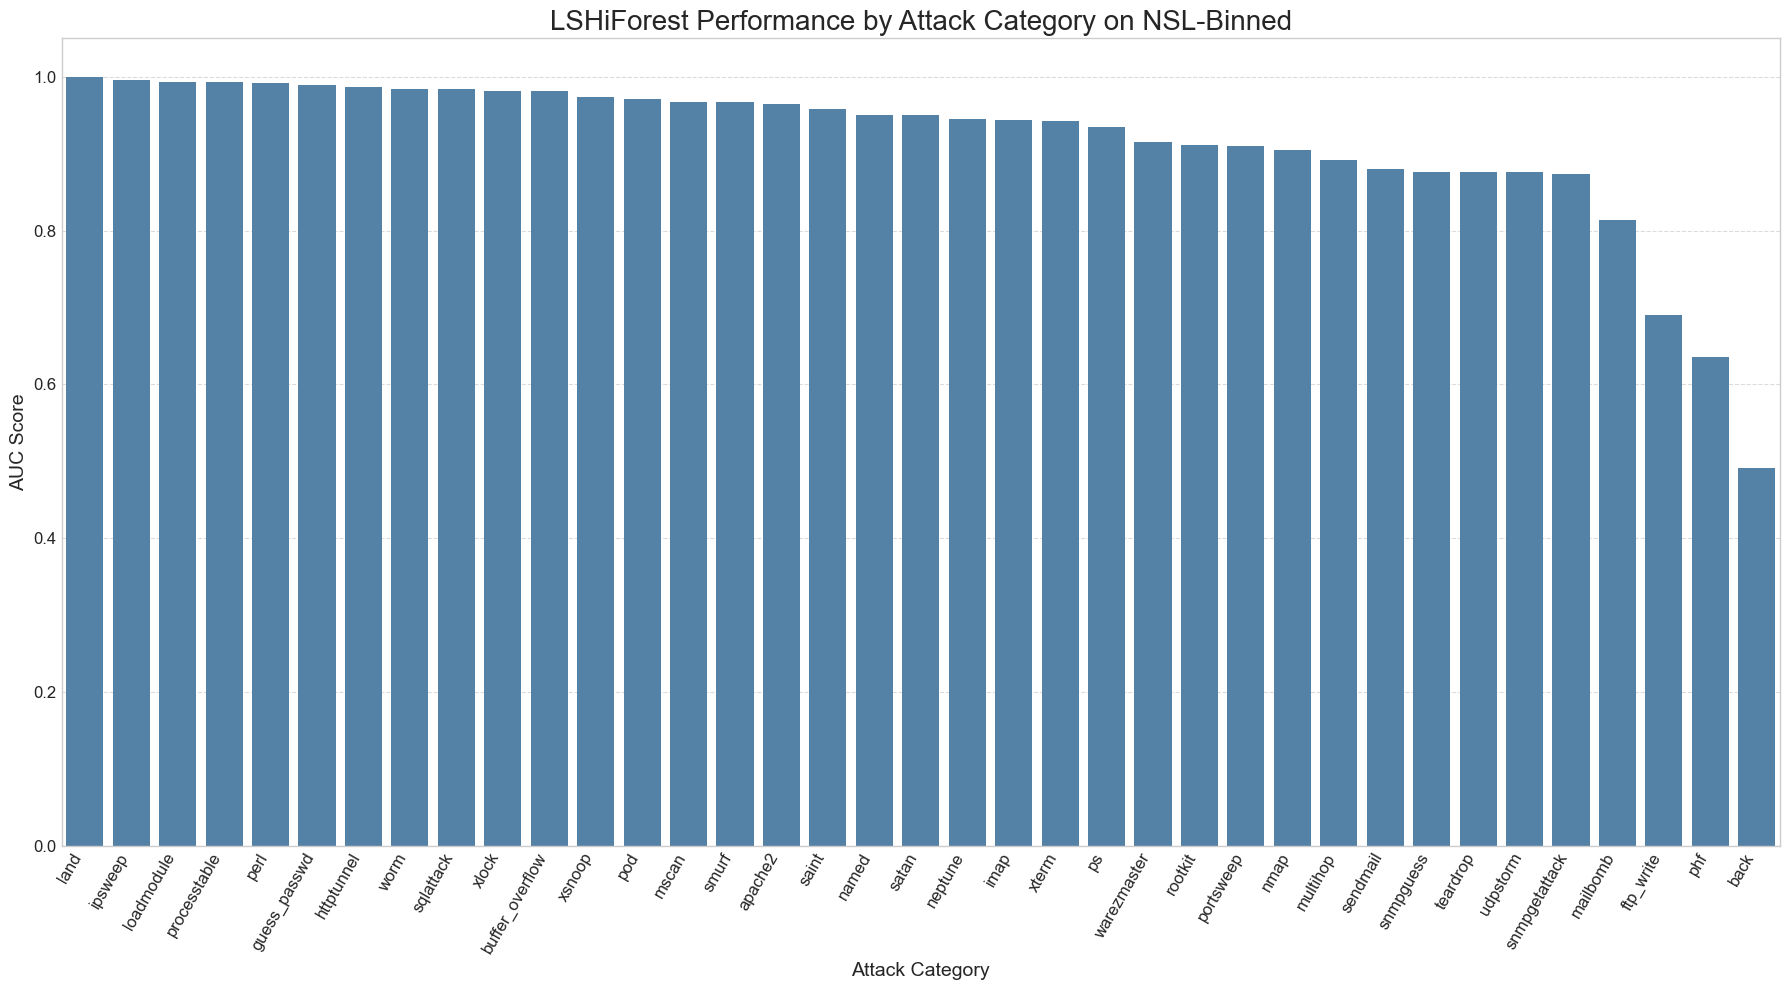

AUC Scores (Each Attack Category vs. Normal Traffic):
    Attack Category  AUC Score
0              land   1.000000
1           ipsweep   0.995373
2        loadmodule   0.993358
3      processtable   0.993091
4              perl   0.991710
5      guess_passwd   0.989959
6        httptunnel   0.987192
7              worm   0.984708
8         sqlattack   0.984708
9             xlock   0.981253
10  buffer_overflow   0.981009
11           xsnoop   0.973329
12              pod   0.971304
13            mscan   0.967877
14            smurf   0.967563
15          apache2   0.964657
16            saint   0.958385
17            named   0.950226
18            satan   0.950149
19          neptune   0.945282
20             imap   0.944393
21            xterm   0.943177
22               ps   0.935345
23      warezmaster   0.915627
24          rootkit   0.910854
25        portsweep   0.910476
26             nmap   0.905242
27         multihop   0.891695
28         sendmail   0.880323
29        snmpgu

<Figure size 640x480 with 0 Axes>

In [22]:
func.auc_by_attack(y_cat, y_test, scores, "NSL-Binned")

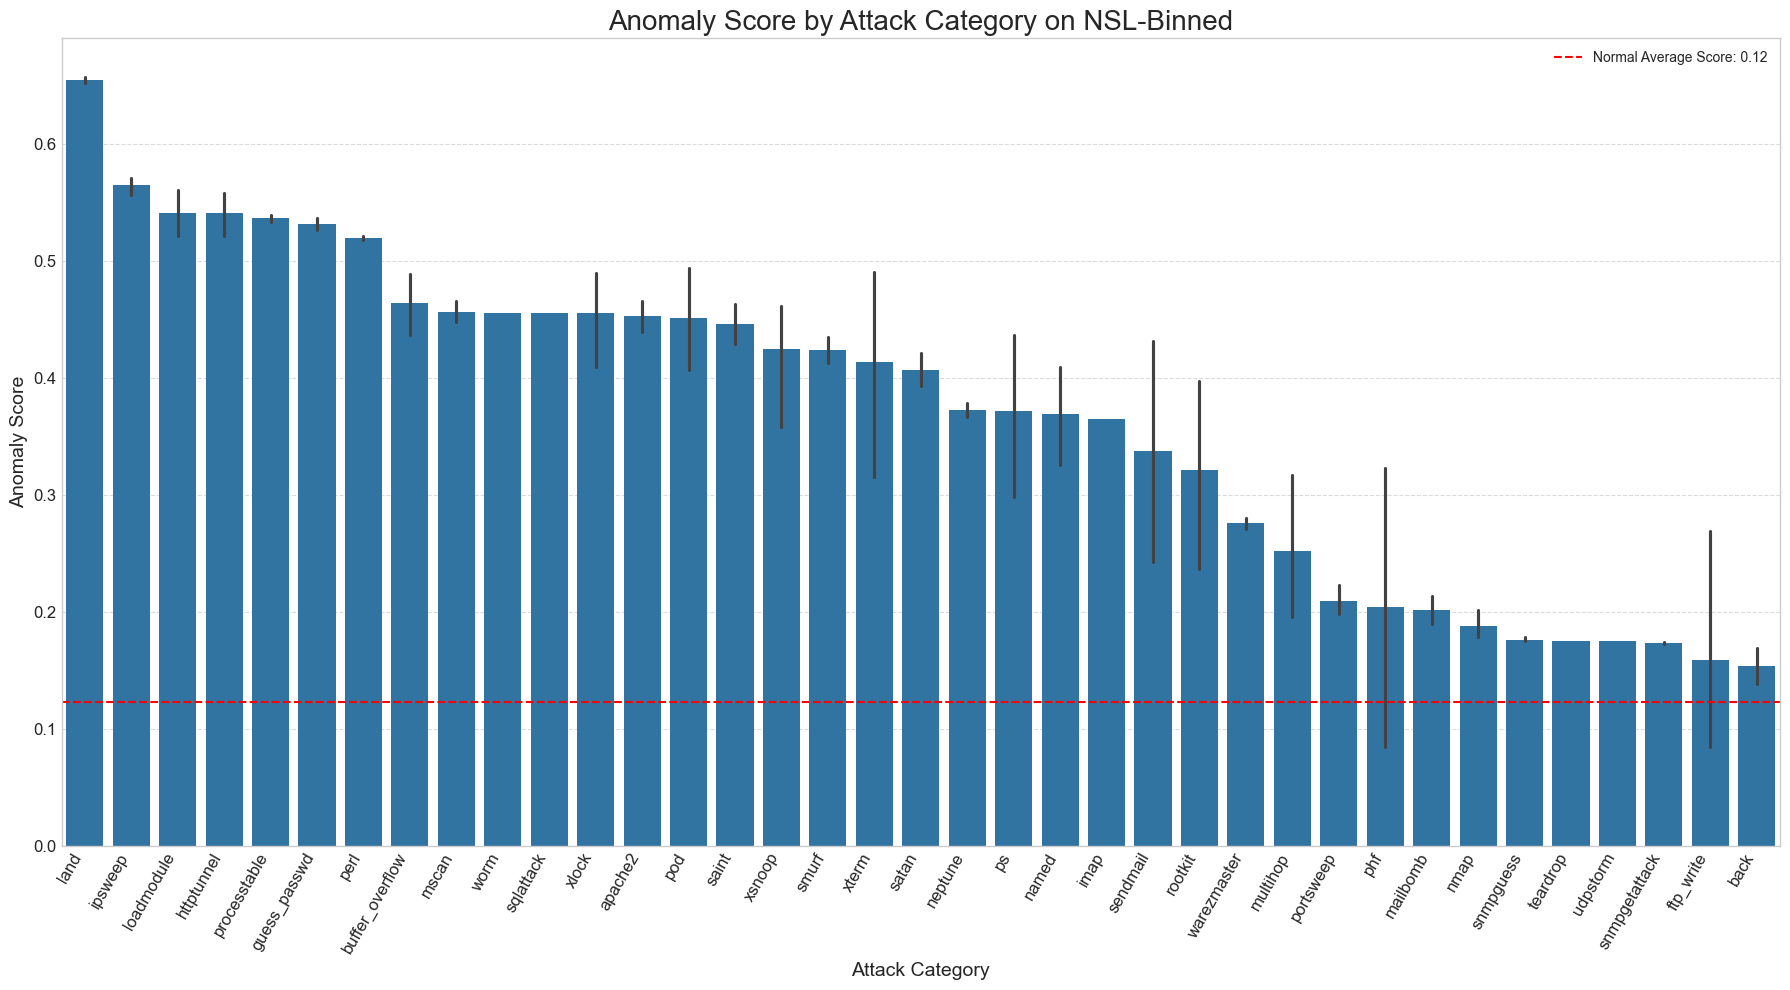

<Figure size 640x480 with 0 Axes>

In [23]:
func.plot_anomaly_score(y_cat, y_test, scores, "NSL-Binned")

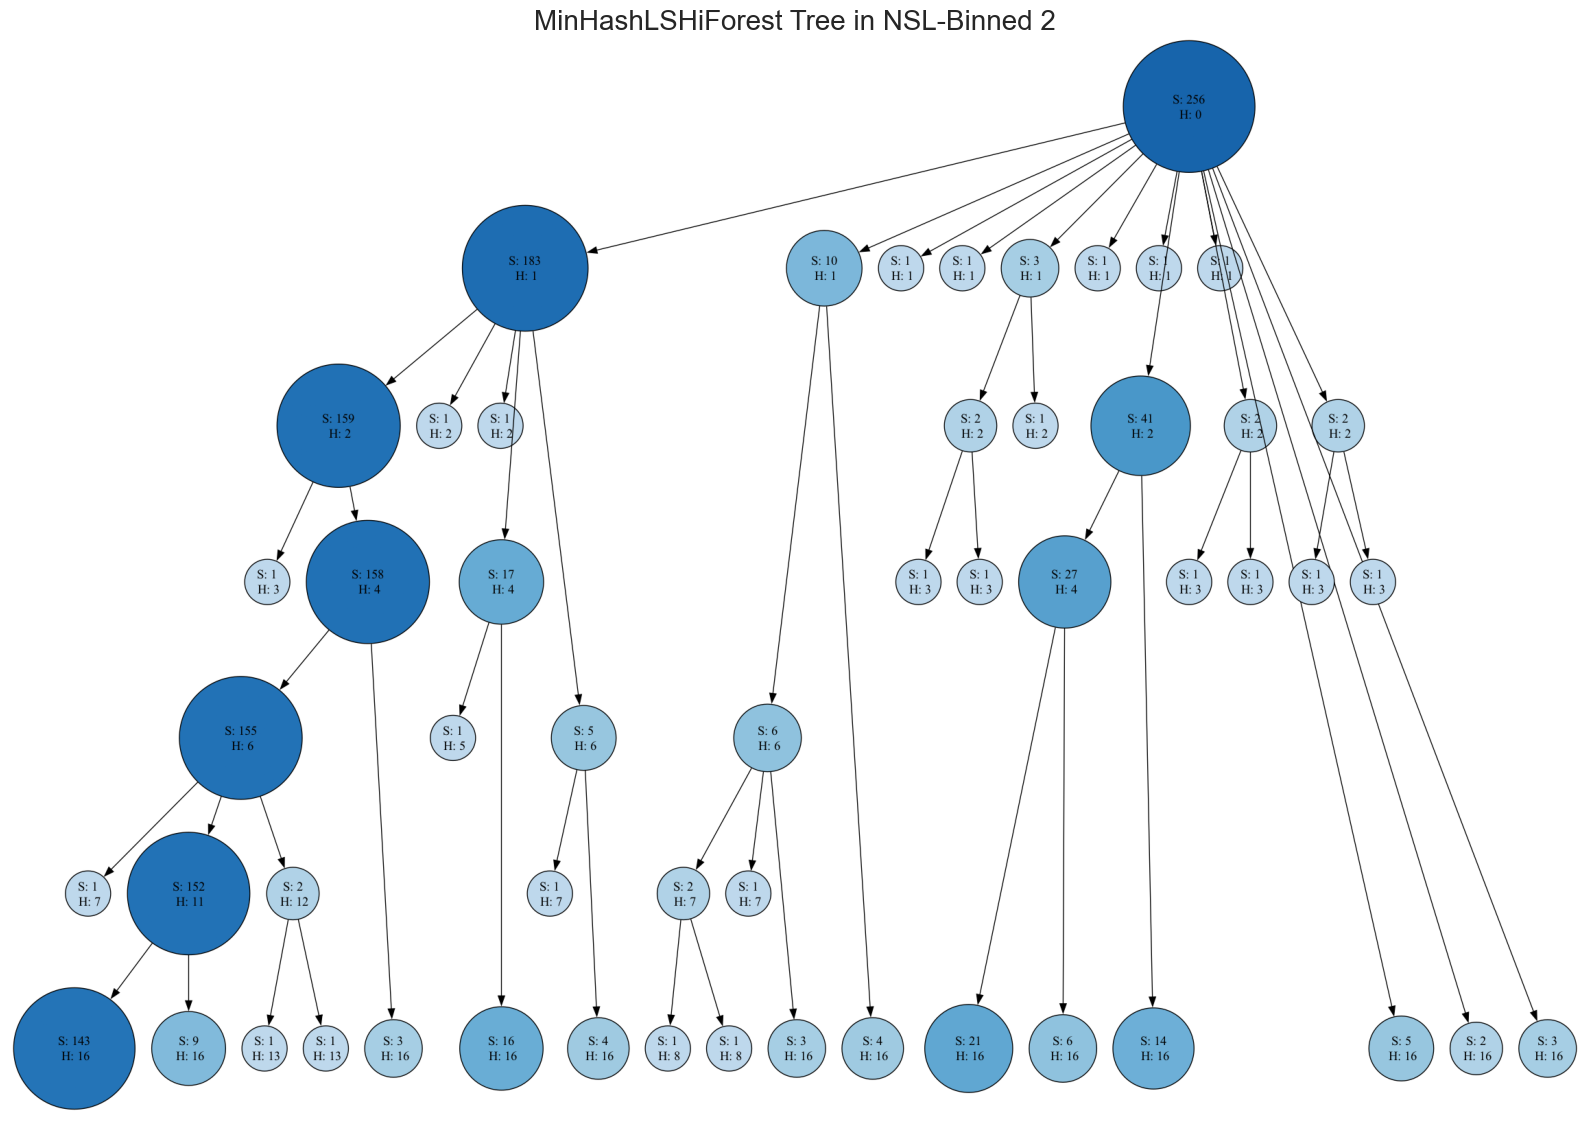

In [24]:
func.plot_tree(lshif, "NSL-Binned", tree_index=2)